In [142]:
import pandas as pd
from scipy.stats import normaltest, shapiro
from matplotlib import pyplot as plt
from IPython.display import clear_output
from statsmodels.graphics.gofplots import qqplot

In [9]:
pd.read_csv('full.csv') #Используем метод read, чтобы посмотреть, что это вообще работает)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [14]:
titanic_info = pd.read_csv('full.csv') 

In [23]:
train = titanic_info.head(1046) #Ничего банальнее, чем разделить данные на две части по 80% и 20%, я не смог придумать
test = titanic_info.tail(263)

In [24]:
train.to_csv('train.csv', index = False) #Создаём и записываем в новый csv файлы наши тренировочные и тестовые df
test.to_csv('test.csv', index = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251EAC8A608>,
      dtype=object)

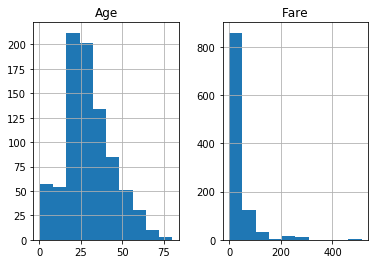

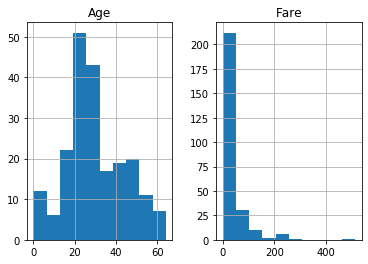

In [36]:
train[['Age', 'Fare']].hist()
test[['Age', 'Fare']].hist()

In [66]:
train[['Age', 'Fare']].describe()

,Age,Fare
count,838.000000,1045.000000
mean,29.899368,32.801941
std,14.480368,51.163291
min,0.420000,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,38.000000,30.695800
max,80.000000,512.329200


In [67]:
test[['Age', 'Fare']].describe()

,Age,Fare
count,208.000000,263.000000
mean,29.807692,35.256495
std,14.175069,54.115868
min,0.170000,0.000000
25%,21.000000,7.883350
50%,27.000000,14.400000
75%,39.000000,35.562500
max,64.000000,512.329200


In [137]:
stat, p = shapiro(test['Fare'])
alpha = 0.05
print(p)
if p > alpha:
    print('Данные, скорее всего, взяты из гауссовского распределения')
else:
    print('H0')
stat, p = normaltest(train['Age'])
print(p)
if p > alpha:
    print('Данные, скорее всего, взяты из гауссовского распределения')
else:
    print('H0')

1.362394830790962e-25
H0
nan
H0


Изменяя имя csv файла и нужную нам колонку, можно увидеть результаты двух тестов.
Тест д'Агостино всегда показывает нулевую гипотезу, а вот тест Шапиро-Вилка наоборот почти всегда(кроме тестовой выборки по 'Fare') заявляет, что между данными есть связь. Этого я немного не понимаю((

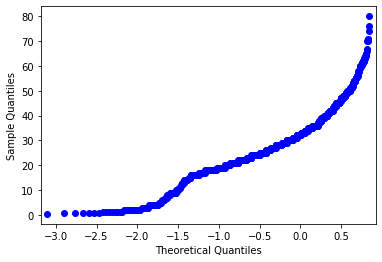

In [141]:
qqplot(train['Age'])
pyplot.show()